In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from filters import Kalman, Kalman_Ensemble, Naive, Bootstrap_PT
from process import gen_process

import pandas as pd

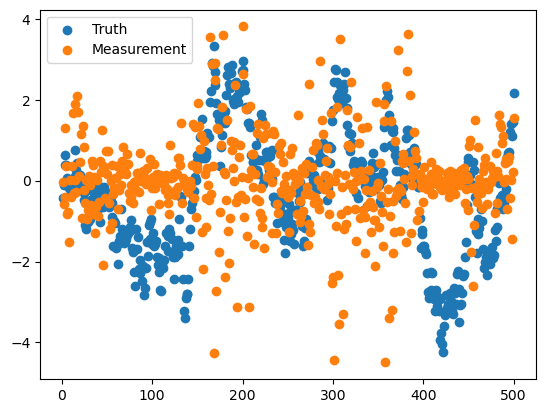

In [2]:
iters, u, y = gen_process(n = 500, linear = False)

plt.scatter(iters, u, label = "Truth")
plt.scatter(iters, y, label = "Measurement")
plt.legend()

In [3]:
data = pd.read_csv('synthetic_data.csv')
y_measurements = data['y'].to_numpy()

c:\Users\mathi\Desktop\stochastic simulation\particleFilter\filters.py:112: RuntimeWarning: invalid value encountered in divide
  K = ((U @ Y.T) / (Y @ Y.T)).flatten()


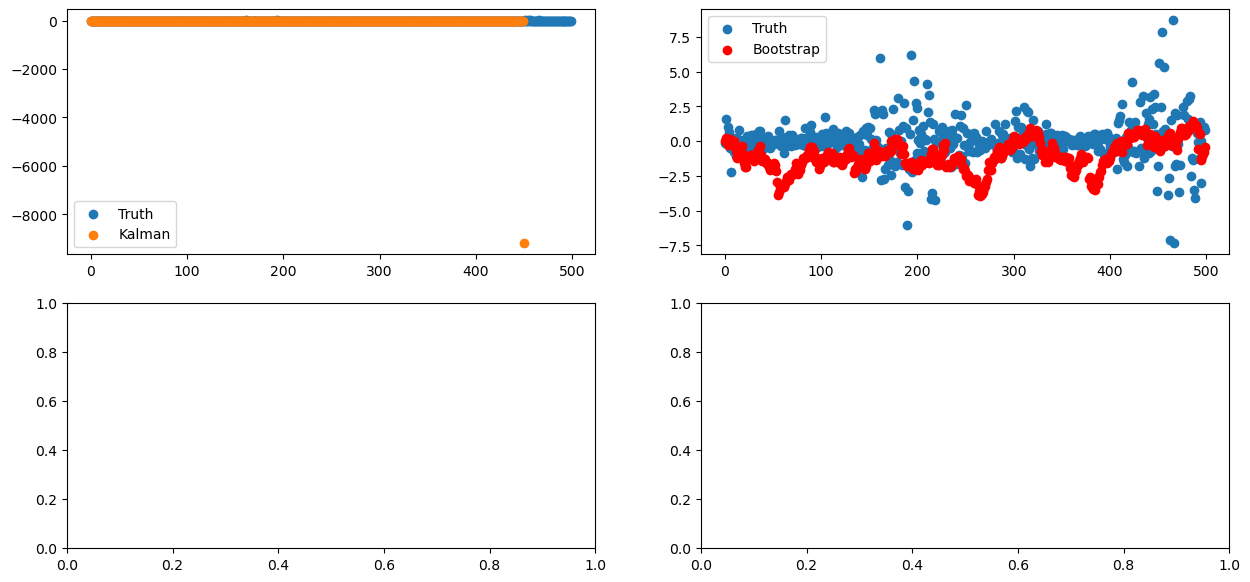

In [4]:
bootstrap = Bootstrap_PT(n = 10, linear = False)
Kalman_ensemble_filter = Kalman_Ensemble(n = 50, linear = False)

max_iters = 500 

for i in range(max_iters):

    Kalman_ensemble_filter.iterate(y_measurements[i])
    bootstrap.iterate(y_measurements[i])

fig, axes = plt.subplots(2,2, figsize = (15,7))

axes[0][0].scatter([i for i in range(max_iters)], y_measurements[:max_iters], label = "Truth")
axes[0][1].scatter([i for i in range(max_iters)], y_measurements[:max_iters], label = "Truth")

axes[0][0].scatter([i for i in range(max_iters)], Kalman_ensemble_filter.u_est_hist, label = "Kalman")
axes[0][1].scatter([i for i in range(max_iters)], bootstrap.u_est_hist, label = "Bootstrap", color = 'red')

axes[0][0].legend()
axes[0][1].legend()

#axes[1][0].scatter(iters[1:], bootstrap.ESS_hist)

In [7]:
grid = np.linspace(0,1,11)

grid_estimates = []
for phi in grid:

    current_estimates = []

    for j in range(10):
        
        bootstrap = Bootstrap_PT(n = 10, linear = False, phi = phi)

        for i in range(max_iters):
            bootstrap.iterate(y_measurements[i])

        current_estimates.append(bootstrap.loglikehood)
    
    grid_estimates.append(current_estimates)

results = {}

for i,pt in enumerate(grid):
    filtered = [el for el in grid_estimates[i] if np.isfinite(el)]
    key = np.round(pt, 2) 
    results[key] = filtered

c:\Users\mathi\Desktop\stochastic simulation\particleFilter\filters.py:178: RuntimeWarning: divide by zero encountered in log
  self.loglikehood += np.log(likelihoods.sum() * 1/self.n)


In [8]:
for key in results.keys():
    print(results[key], '\n')

[-1009.054758242974, -965.6209854306206, -973.3143374249521, -973.6186918109453, -922.0431984194735, -947.6278721752388, -946.8032557421409, -940.6152189855601, -944.3021084411714, -962.5147192816122] 

[-984.4828724665267, -935.9296376021967, -972.2236891322526, -941.6216470866609, -951.263834827374, -973.7564344369661, -979.5466283674258, -984.7959716207387, -985.0834320538937, -981.2171008674142] 

[-940.9194197876451, -956.8212696285592, -976.2324442001338, -942.8213665140369, -980.4360617344636, -950.5666762898592, -958.269025589951, -944.4842156509835, -959.0137717003438, -968.3599744654762] 

[-1016.5962173302418, -1026.6194916976053, -964.9610914136658, -968.1996837820227, -920.6255405424449, -954.2338884006089, -940.4079052490417, -927.6467185077213, -960.5761539583026, -933.9993722062474] 

[-979.8216353138769, -947.9252180362818, -950.0107998059727, -941.8667309794239, -944.5497068578786, -905.2481478933902, -967.8723138715993, -928.5237358315359, -941.9022324716452, -932.58

C:\Users\mathi\AppData\Local\Temp\ipykernel_2820\2122135750.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


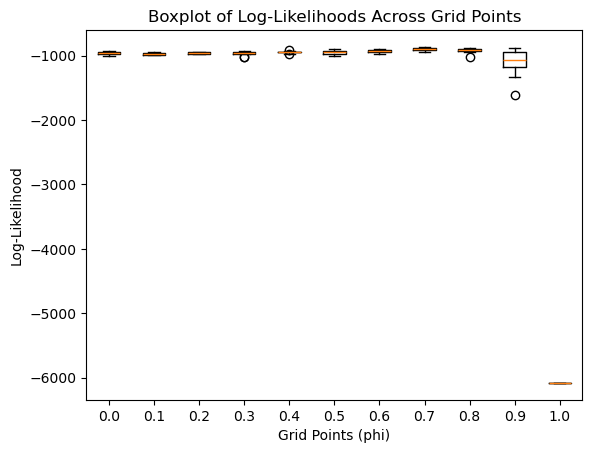

In [9]:
# Create a boxplot
plt.boxplot(results.values(), labels=results.keys())

# Add labels and title
plt.xlabel("Grid Points (phi)")
plt.ylabel("Log-Likelihood")
plt.title("Boxplot of Log-Likelihoods Across Grid Points")

# Show the plot
plt.show()    